<a href="https://colab.research.google.com/github/narenthiran088/Guvi_Final_Project/blob/main/Customer_Conversion_Prediction_guvi_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Conversion Prediction**
☛ **Problem Statement** :
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.



## **Variables in the Dataset :**

✤ age (numeric)

✤ job : type of job

✤ marital : marital status

✤ educational_qual : education status

✤ call_type : contact communication type

✤ day: last contact day of the month (numeric)

✤ mon: last contact month of year

✤ dur: last contact duration, in seconds (numeric)

✤ num_calls: number of contacts performed during this campaign and for this client

✤ prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

✤ Output variable (desired target): ✤ y - has the client subscribed to the insurance?

## **Libraries**

In [1]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## **Read Dataset**

In [2]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('train_Customer_Conversion_Prediction.csv')
pd.set_option('display.max_columns',None)
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [5]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


## **Checking and Handling Missing Values**

In [6]:
## looking for the amount of null data in the pandas dataframe
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

## **Data Cleaning**

In [7]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [8]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [9]:
df=df.rename(columns={"y":"target"})

In [10]:
#df = df.drop(columns=['target'])

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [12]:
df['target'].value_counts()

no     39922
yes     5289
Name: target, dtype: int64

In [13]:
df.head(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


#**The continues columns are having too many categories, seems like it is needed to analyze all of them one by one.**

## **1.AGE**

In [14]:
# for column "age"
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [15]:
sum(df.age.isnull())

0

In [16]:
#if its null value we can drop the value using drpna
#df=df.dropna(subset=['age'])

In [17]:
df.age.values[0]

58

In [18]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

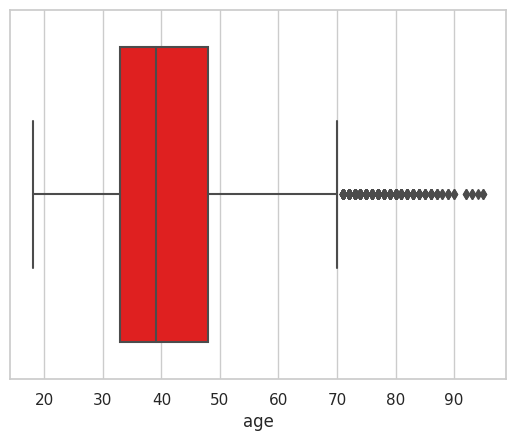

In [19]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'],color='red')

In [20]:
#IQR
q3=df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr= q3-q1

In [21]:
#thresholds
q3+(1.5*iqr)

70.5

In [22]:
#thresholds
q1-(1.5*iqr)

10.5

In [23]:
#To correct the oulier and setup the thresholds
df.age=df.age.clip(10.5,70.5) #clip fun (lowthreshold,upprthreshold)

In [24]:
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='age'>

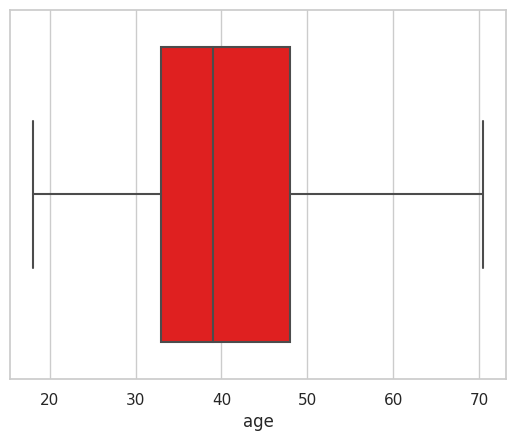

In [25]:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'],color='red')

## **2.DAY**

In [26]:
# for column "day"
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [27]:
sum(df.day.isnull())

0

In [28]:
df.day.values[0]

5

In [29]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

<Axes: xlabel='day'>

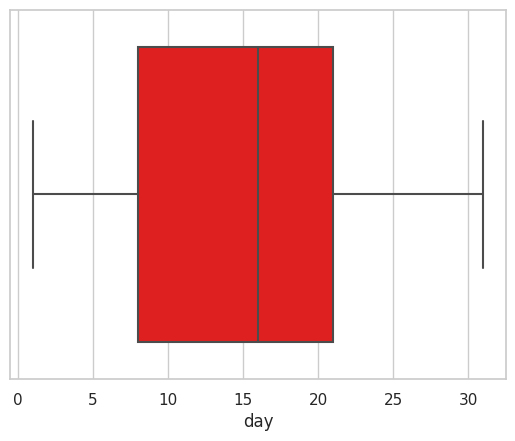

In [30]:
sns.set(style="whitegrid")
sns.boxplot(x=df['day'],color='red')

## **3.DURATION**

In [31]:
# for column "dur"
df['dur'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [32]:
sum(df.dur.isnull())

0

In [33]:
df.dur.values[0]

261

In [34]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

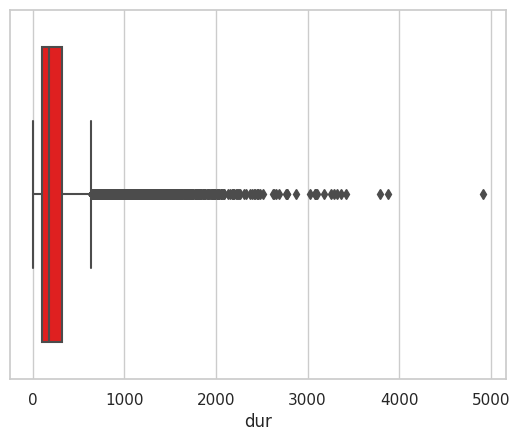

In [35]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'],color='red')

In [36]:
#IQR
q3=df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr= q3-q1

In [37]:
# Upper threshold
q3+(1.5*iqr)

643.0

In [38]:
# lower threshold
q1-(1.5*iqr)

-221.0

In [39]:
#To correct the oulier and setup the thresholds
df.dur=df.dur.clip(-221.0,643.0) #clip fun (lowthreshold,upprthreshold)

In [40]:
df.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

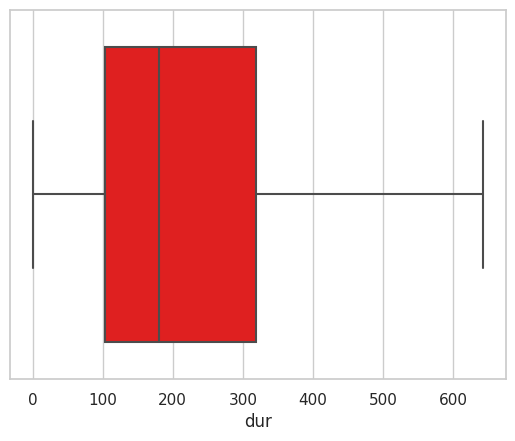

In [41]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dur'],color='red')

## **4.NUMBER OF CALLS**

In [42]:
# for column "num_calls"
df['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [43]:
sum(df.num_calls.isnull())

0

In [44]:
df.num_calls[0]

1

In [45]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

<Axes: xlabel='num_calls'>

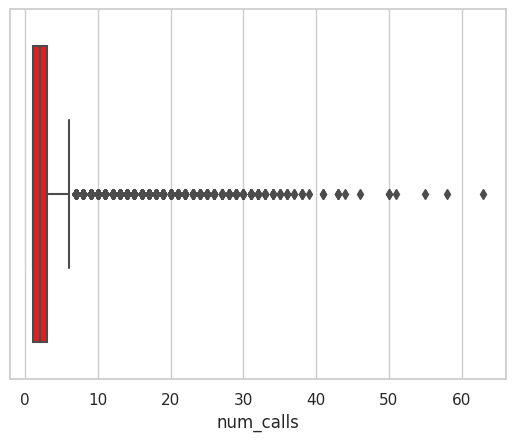

In [46]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'],color='red')

In [47]:
#IQR
q3=df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr= q3-q1

In [48]:
# Upper threshold
q3+(1.5*iqr)

6.0

In [49]:
# lower threshold
q1-(1.5*iqr)

-2.0

In [50]:
#To correct the oulier and setup the thresholds
df.num_calls=df.num_calls.clip(-2.0,6.0) #clip fun (lowthreshold,upprthreshold)

In [51]:
df.num_calls.describe()

count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

<Axes: xlabel='num_calls'>

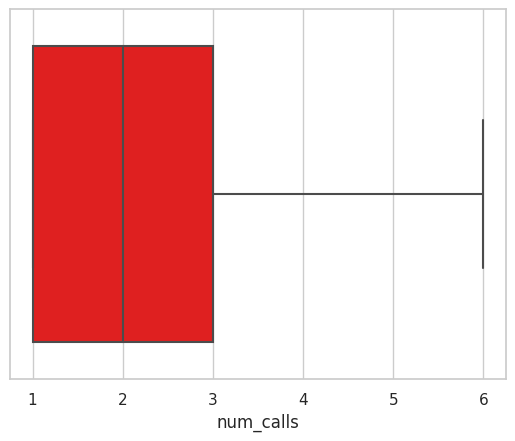

In [52]:
sns.set(style="whitegrid")
sns.boxplot(x=df['num_calls'],color='red')

#The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.

## **1.JOB**

In [53]:
# for column "job"
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [54]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [55]:
# Need to find the null value and need to drop

In [56]:
df['job']=df['job'].replace('unknown',np.nan)

In [57]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.637013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.job.isnull().sum()

288

In [59]:
df=df.dropna(subset=['job'])

In [60]:
df.job.isnull().sum()

0

In [61]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **2.MARITAL**

In [62]:
# for column "marital"
df['marital'].value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [63]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [64]:
df.marital.isnull().sum()

0

## **3.EDUCATION QUALIFICATION**

In [65]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education_qual, dtype: int64

In [66]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [67]:
# Need to find the null value and need to drop
df['education_qual']=df['education_qual'].replace('unknown',np.nan)

In [68]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,3.851034,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df.education_qual.isnull().sum()

1730

In [70]:
df=df.dropna(subset=['education_qual'])

In [71]:
df.education_qual.isnull().sum()

0

In [72]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **4.CALL TYPE**

In [73]:
# for column "call_type"
df['call_type'].value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: call_type, dtype: int64

In [74]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [75]:
df['call_type']=df['call_type'].replace('unknown',np.nan)

In [76]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,0.0,28.444424,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
df['call_type']=df['call_type'].replace(np.nan,'unknown')

In [78]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **5.MONTH**

In [79]:
# for column "mon"
df['mon'].value_counts()

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [80]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

## **6.PREVIOUS OUTCOME**

In [81]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [82]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [83]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **7.Y (TARGET)**

In [84]:
# for column "y"
df['target'].value_counts()

no     38172
yes     5021
Name: target, dtype: int64

In [85]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

# Here in all the columns there is no such spelling error, everything here is okay!

In [86]:
df.duplicated().sum()

16

## **FIND THE DUPLICATES ROWS AND DROP THE DUPLICATES**

In [87]:
# If its duplicated value need to drop the value
#df=df.drop_duplicates()

In [88]:
df=df.drop_duplicates()

In [89]:
df.duplicated().sum()

0

In [90]:
df.shape

(43177, 11)

## **Data Visualization.**

In [91]:
df['job'].value_counts().index[::-1]

Index(['student', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed',
       'retired', 'services', 'admin.', 'technician', 'management',
       'blue-collar'],
      dtype='object')

In [92]:
!pip install seaborn==0.11

## **EDA **

**Distribution of Features**

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

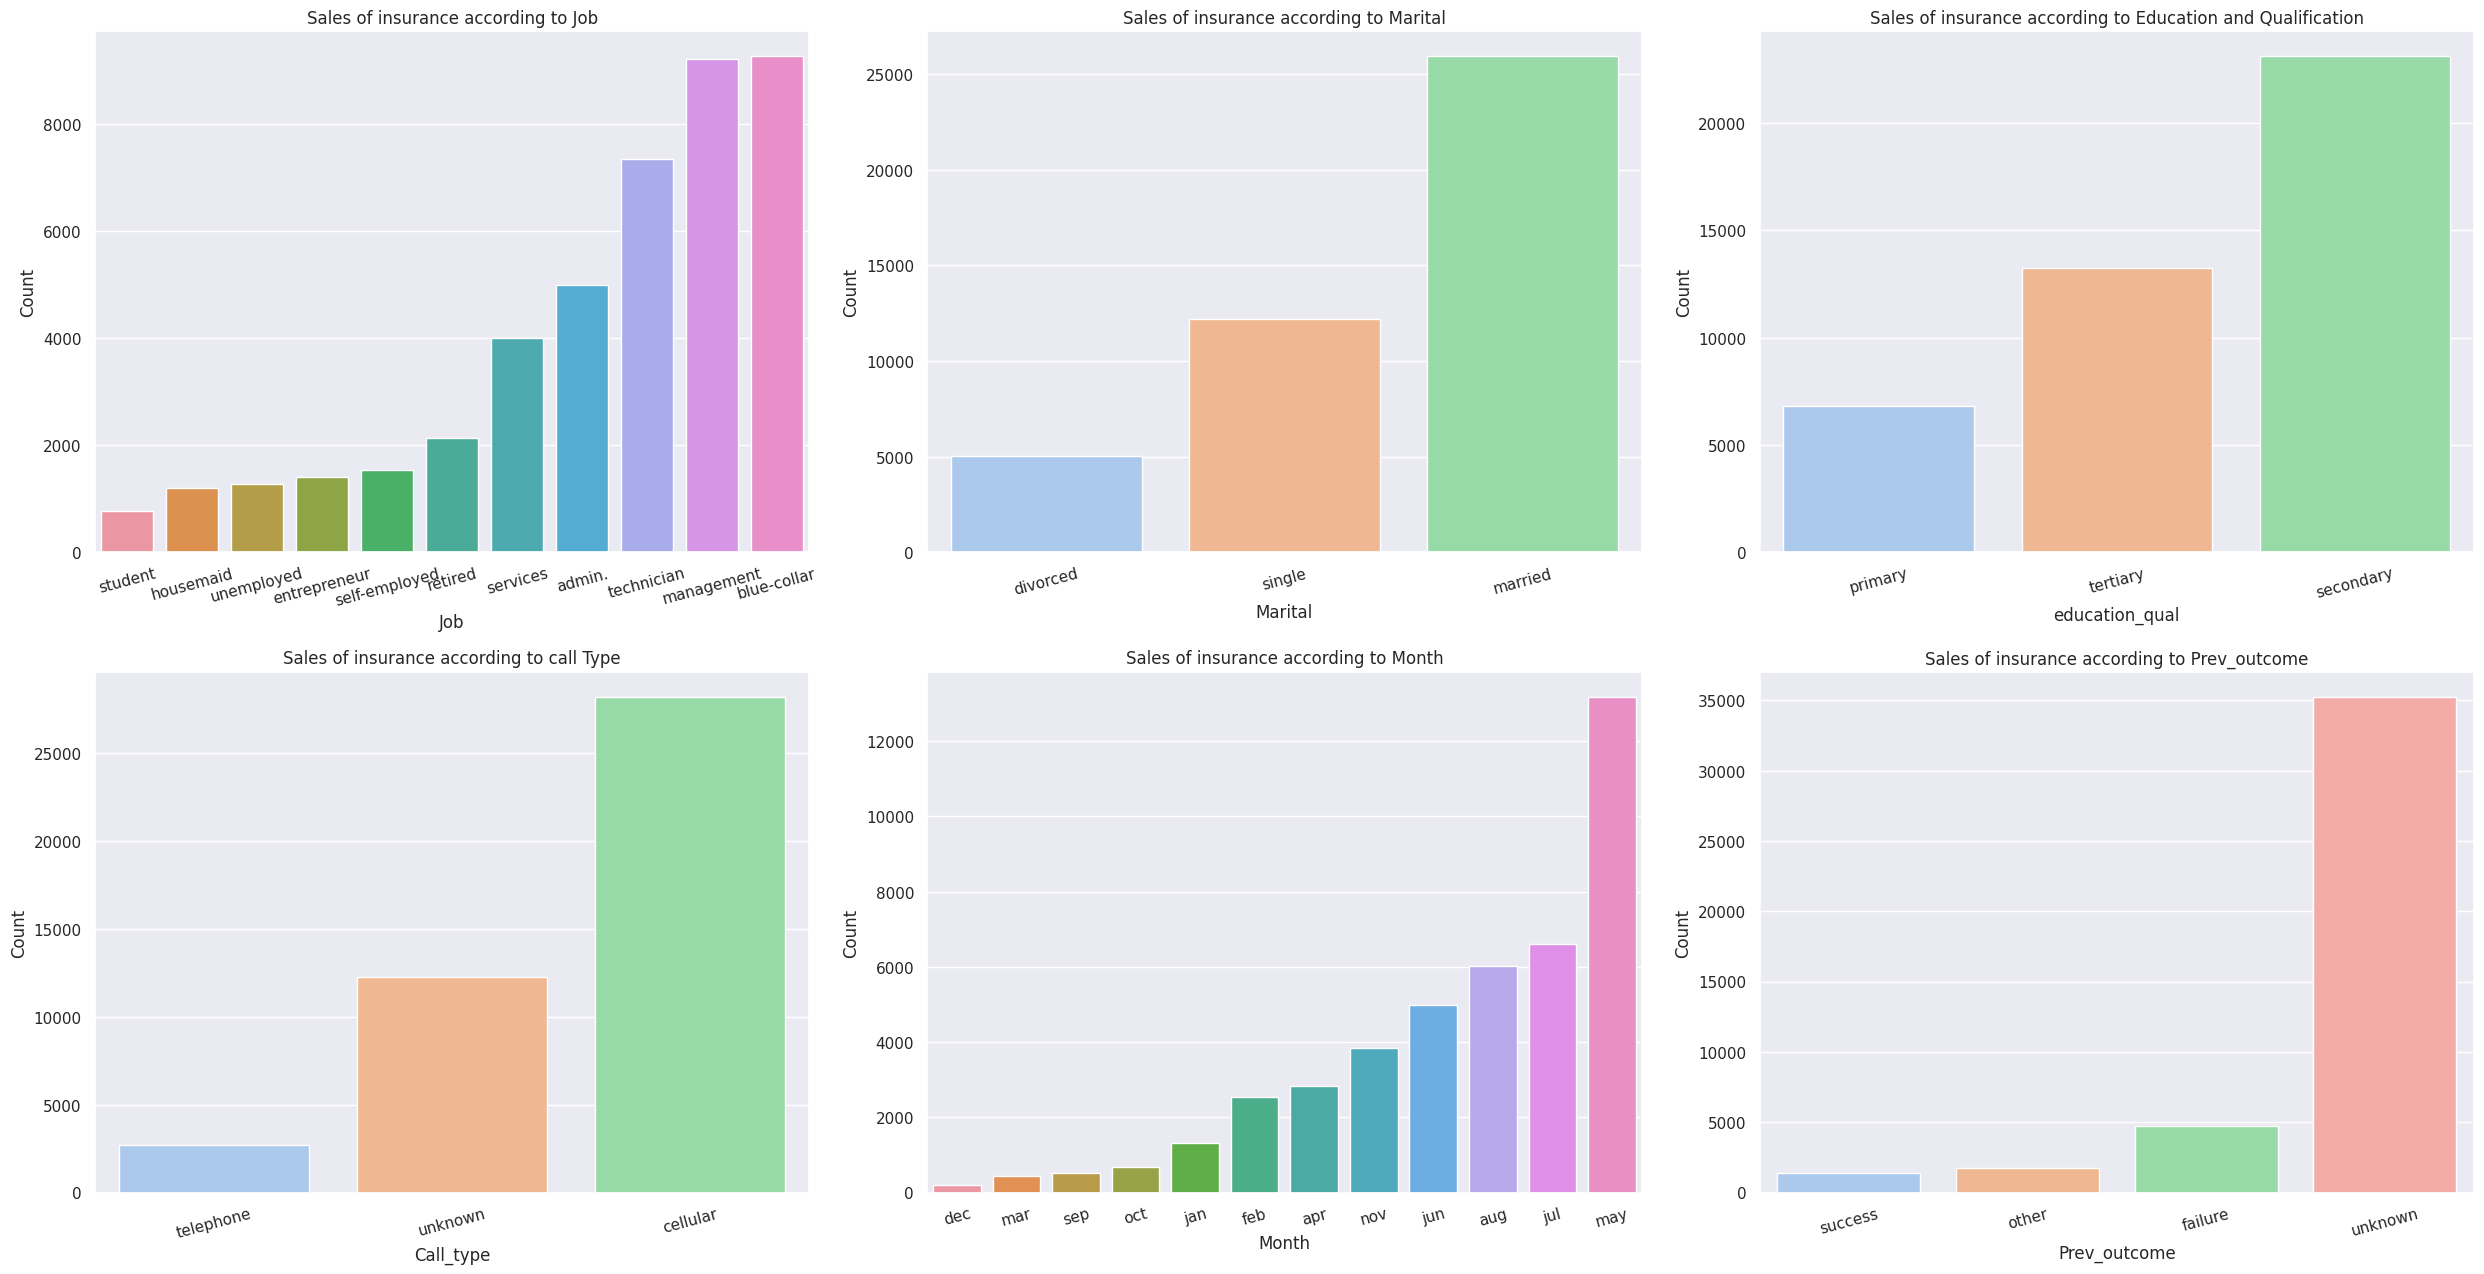

In [93]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(25,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Sales of insurance according to Job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Sales of insurance according to Marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Sales of insurance according to Education and Qualification')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Call_type')
plt.ylabel('Count')
plt.title('Sales of insurance according to call Type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sales of insurance according to Month')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Prev_outcome')
plt.ylabel('Count')
plt.title('Sales of insurance according to Prev_outcome')

plt.tight_layout()



**Interpretations :**

 1.) According to the column **"job"** the highest number of insurance sold were in the job **"blue-collar"**.

 2.) According to the column **"marital"**, the highest number of insurance sold were in the marital **"Married".**

 3.) According to the column **"education_qual"**, the highest number of insurance sold were in the education_qual **"secondary"**.

 4.) According to the column **"call_type"**, the highest number of insurance sold were in the call_type **"cellular"**.

 5.) According to the column **"mon"**, the highest number of insurance sold were in the mon **"May"**.

 6.) According to the column **"prev_outcome"**, the highest number of insurance sold were in the prev_outcome **"unknown"**.

 7.) According to the column** "y"**,has the client subscribed to the insurance or not? the highest number of client were in the y is **"no"**.

## **Feature Vs Target (Categorical Columns)**
**PLOTTING THE DISTRIBUTION OF CATEGORICAL FEATURES VS TARGET**

In [94]:
job_order=df['job'].value_counts().index[::-1]
marital_order=df['marital'].value_counts().index[::-1]
education_qual_order=df['education_qual'].value_counts().index[::-1]
call_type_order=df['call_type'].value_counts().index[::-1]
mon_order=df['mon'].value_counts().index[::-1]
prev_outcome_order=df['prev_outcome'].value_counts().index[::-1]

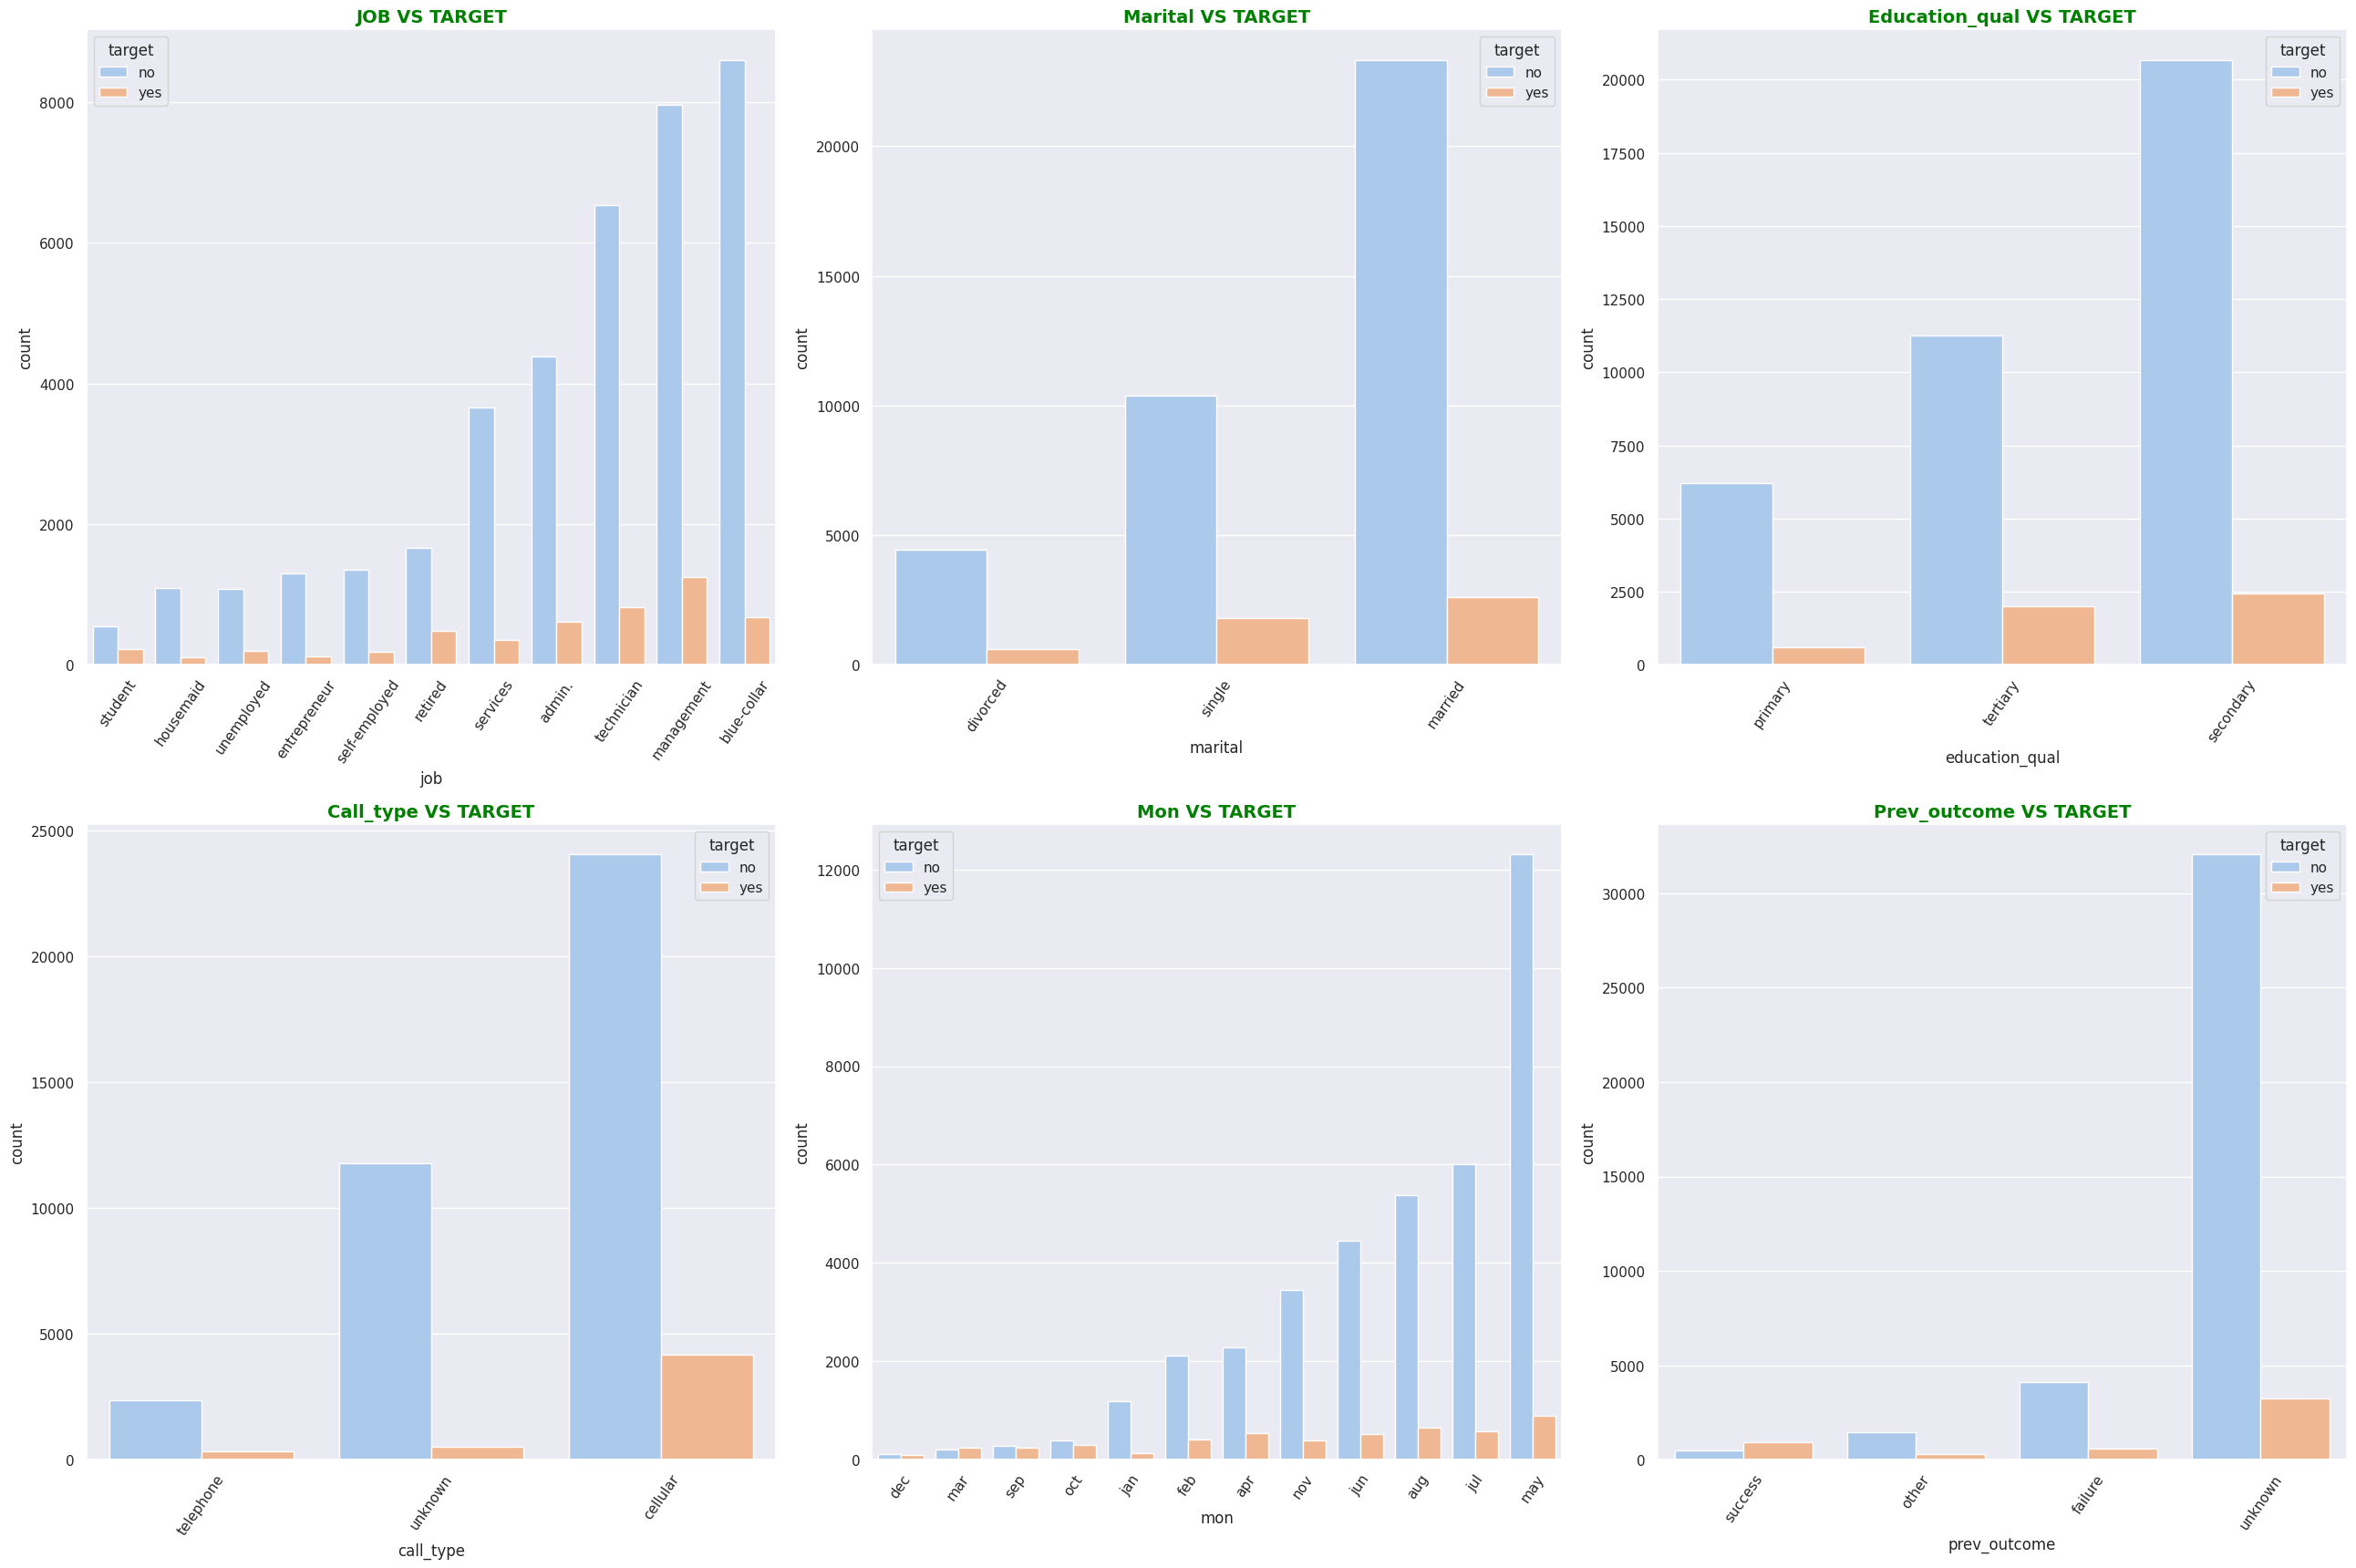

In [95]:
plt.figure(figsize=(26,25))

plt.subplot(331)
sns.countplot(x='job', hue='target', data=df,order=job_order)
plt.xticks(rotation=55)
plt.title('JOB VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.subplot(332)
sns.countplot(x='marital', hue='target', data=df,order=marital_order)
plt.xticks(rotation=55)
plt.title('Marital VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.subplot(333)
sns.countplot(x='education_qual', hue='target', data=df,order=education_qual_order)
plt.xticks(rotation=55)
plt.title('Education_qual VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.subplot(334)
sns.countplot(x='call_type', hue='target', data=df,order=call_type_order)
plt.xticks(rotation=55)
plt.title('Call_type VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.subplot(335)
sns.countplot(x='mon', hue='target', data=df,order=mon_order)
plt.xticks(rotation=55)
plt.title('Mon VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.subplot(336)
sns.countplot(x='prev_outcome', hue='target', data=df,order=prev_outcome_order)
plt.xticks(rotation=55)
plt.title('Prev_outcome VS TARGET',fontsize = 14, color='green', fontweight='bold')

plt.tight_layout()





## **Feature vs Target (Numerical Columns)**
**PLOTTING THE DISTRIBUTION OF NUMERICAL FEATURES VS TARGET**

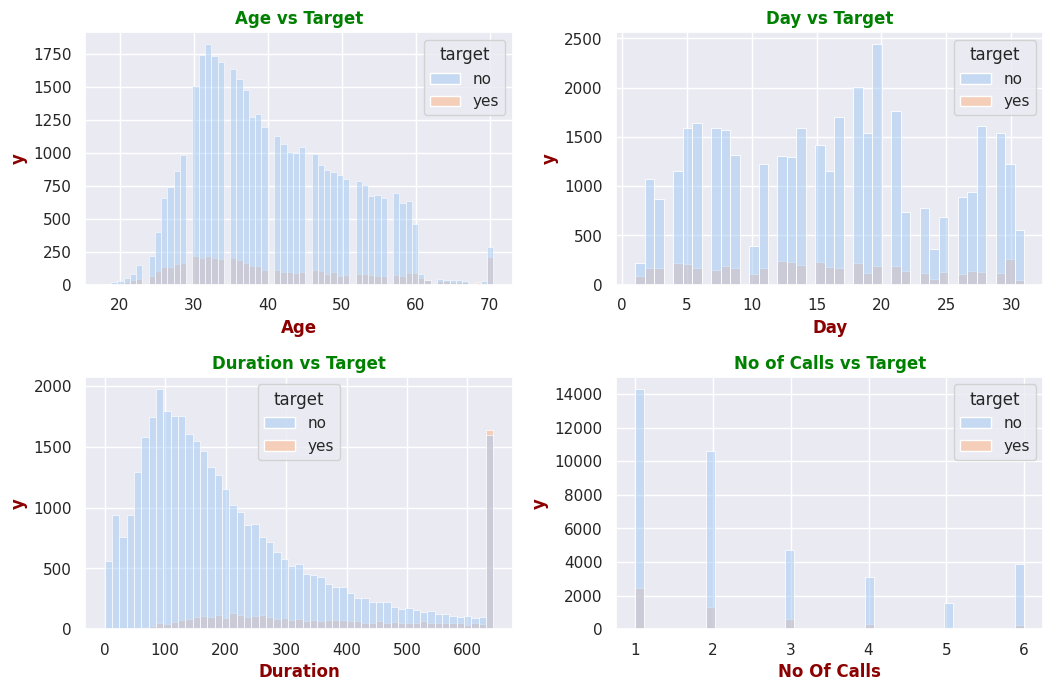

In [96]:
plt.figure(figsize=(16,10))

plt.subplot(331)
sns.histplot(x='age' ,hue='target', data=df)
plt.xticks(rotation=0)
plt.title('Age vs Target', fontweight='bold', color='green' )
plt.xlabel('Age', color='DarkRed', fontweight='bold')
plt.ylabel('y', color='DarkRed', fontweight='bold')

plt.subplot(332)
sns.histplot(x='day' ,hue='target', data=df)
plt.xticks(rotation=0)
plt.title('Day vs Target', fontweight='bold', color='green' )
plt.xlabel('Day', color='DarkRed', fontweight='bold')
plt.ylabel('y', color='DarkRed', fontweight='bold')


plt.subplot(334)
sns.histplot(x='dur' ,hue='target', data=df)
plt.xticks(rotation=0)
plt.title('Duration vs Target', fontweight='bold', color='green' )
plt.xlabel('Duration', color='DarkRed', fontweight='bold')
plt.ylabel('y', color='DarkRed', fontweight='bold')

plt.subplot(335)
sns.histplot(x='num_calls' ,hue='target', data=df)
plt.xticks(rotation=0)
plt.title('No of Calls vs Target', fontweight='bold', color='green' )
plt.xlabel('No Of Calls', color='DarkRed', fontweight='bold')
plt.ylabel('y', color='DarkRed', fontweight='bold')

plt.tight_layout()



## **Pre-Processing**


## **Encoding Categorical Variables**

In [97]:

df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [98]:
# Encoding for job column
df['job']=df['job'].map({'student':0,'housemaid':1,'unemployed':2,'entrepreneur':3,'self-employed':4,'retired':5,'services':7,'admin.':8, 'technician':10, 'management': 12, 'blue-collar' : 13})

# Encoding for marital status column
df['marital'] =df['marital'].map({'divorced': 0, 'single' : 1 ,'married': 2})

# Encoding for educational qualification column
df['education_qual'] = df['education_qual'].map({'primary': 0,'tertiary' :1, 'secondary': 2 })

# Encoding for month column
df['mon']=df['mon'].map({'dec': 0, 'mar' : 1, 'sep': 2, 'oct': 3, 'jan' : 4, 'feb' : 5, 'apr' : 6, 'nov' : 7, 'jun' : 8, 'aug' : 9 , 'jul': 10, 'may': 12})

# Encoding for call type column
df['call_type'] = df['call_type'].map({'telephone' : 0,'unknown': 1, 'cellular' : 2})

# Encoding for previous outcome column
df['prev_outcome']=df['prev_outcome'].map({'success' : 0, 'other' : 1, 'failure' : 2,  'unknown': 4})

# Encoding for y column
df['target'] = df["target"].map({"yes":1 , "no": 0})

In [99]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,12,2,1,1,5,12,261,1,4,0
1,44.0,10,1,2,1,5,12,151,1,4,0
2,33.0,3,2,2,1,5,12,76,1,4,0
5,35.0,12,2,1,1,5,12,139,1,4,0
6,28.0,12,1,1,1,5,12,217,1,4,0


## **Splitting the data into input data and output data**

In [100]:
x= df.drop('target',axis=1)
y= df['target']

In [101]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,12,2,1,1,5,12,261,1,4
1,44.0,10,1,2,1,5,12,151,1,4
2,33.0,3,2,2,1,5,12,76,1,4
5,35.0,12,2,1,1,5,12,139,1,4
6,28.0,12,1,1,1,5,12,217,1,4
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,10,2,1,2,17,7,643,3,4
45207,70.5,5,0,0,2,17,7,456,2,4
45208,70.5,5,2,2,2,17,7,643,5,0
45209,57.0,13,2,2,0,17,7,508,4,4


In [102]:
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 43177, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 19 )

In [104]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(34541, 10) (8636, 10) (34541,) (8636,)


In [105]:
X_train

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
7303,43.0,10,1,2,1,29,12,13,3,4
12136,53.0,12,1,1,1,20,8,94,6,4
23313,58.0,5,2,2,2,27,9,104,5,4
27012,58.0,1,2,1,2,21,7,91,1,4
41489,33.0,4,2,2,2,8,2,165,1,0
...,...,...,...,...,...,...,...,...,...,...
35343,29.0,13,1,2,2,7,12,293,1,4
22498,38.0,4,2,1,2,22,9,508,6,4
35695,31.0,2,0,2,2,8,12,65,2,2
18057,50.0,3,2,2,0,30,10,340,2,4


## **Balancing**

In [106]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

In [107]:
len(X_train_balanced)

52582

In [108]:
len(y_train_balanced)

52582

## **Scaling**

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

## **Building Machine Learning Model**

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

## **Linear regression**

In [111]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train_scaled,y_train_balanced) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[17.54631347 14.75265709 50.85585403 ... 50.55418861 19.69393781
 19.24835013]
20957    0
11302    0
26176    0
37048    0
43102    1
        ..
5102     0
8366     0
39155    0
11217    0
15465    0
Name: target, Length: 8636, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:
linear_model.score(X_test_scaled, y_test)

-0.6272764695091526

In [113]:
cross_val_linear_model=cross_val_score(linear_model,X_train_scaled,y_train_balanced,cv=10).mean()
print("Cross Validation score for linear regression  :",cross_val_linear_model)

Cross Validation score for linear regression  : 0.052628178500368515


## **Logistic Regression**

In [114]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(X_train_scaled,y_train_balanced)

lr.score(X_test_scaled,y_test)

0.7735062528948587

In [115]:
lr_pred_probs=lr.predict_proba(X_test_scaled)
lr_pred_probs

array([[0.98731523, 0.01268477],
       [0.9444876 , 0.0555124 ],
       [0.54250083, 0.45749917],
       ...,
       [0.97293922, 0.02706078],
       [0.88703446, 0.11296554],
       [0.98952622, 0.01047378]])

In [116]:
cross_val_linear_model=cross_val_score(lr,X_train_scaled,y_train_balanced,cv=10).mean()
print("Cross Validation score for logistic regression  :",cross_val_linear_model)

Cross Validation score for logistic regression  : 0.89542132522045


In [117]:
log_reg_auc = roc_auc_score(y_test,lr_pred_probs[:,1])
print("AUROC score for logistic regression  :  ",round(log_reg_auc,2))

AUROC score for logistic regression  :   0.88


## **K-Nearest Neighbour (KNN)**

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_values=np.arange(1,20)
cross_val_knn=[]
for i in knn_values:
  knn= KNeighborsClassifier(i)
  knn.fit(X_train_scaled, y_train_balanced)
  print("K value :", i, "Train Score : ", knn.score(X_train_scaled,y_train_balanced), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test_scaled, y_test, cv=10)))


K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.8700771962576713
K value : 2 Train Score :  0.9833593244836636 Cross Value Accuracy : 0.8888379254109265
K value : 3 Train Score :  0.9720626830474307 Cross Value Accuracy : 0.8869843300716708
K value : 4 Train Score :  0.9674032939028565 Cross Value Accuracy : 0.8887219164413545
K value : 5 Train Score :  0.9612605073979689 Cross Value Accuracy : 0.8915010353632891
K value : 6 Train Score :  0.9583127305922179 Cross Value Accuracy : 0.8894164950002146
K value : 7 Train Score :  0.9552698642120878 Cross Value Accuracy : 0.8916163737607828
K value : 8 Train Score :  0.9525693202997223 Cross Value Accuracy : 0.8899954669327496
K value : 9 Train Score :  0.9506294929823894 Cross Value Accuracy : 0.8920800072958242
K value : 10 Train Score :  0.948841808984063 Cross Value Accuracy : 0.8891848794043173
K value : 11 Train Score :  0.9467308204328477 Cross Value Accuracy : 0.8906903137204412
K value : 12 Train Score :  0.9456467992849265

In [119]:
cross_val_knn.append(cross_val_score(knn,X_train_scaled,y_train_balanced,cv = 10).mean())

In [120]:
cross_val_knn_Classifier=max(cross_val_knn)

In [121]:
print("The best K-Value is 9 and Cross_val_score is",cross_val_knn_Classifier )

The best K-Value is 9 and Cross_val_score is 0.9293683432505823


**The best K-Value is 9 and Cross_val_score is 0.9303934613191409**

In [122]:
knn_classifier=KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train_scaled,y_train_balanced)

KNeighborsClassifier(n_neighbors=9)

In [123]:
cross_val_knn_classifier=cross_val_score(knn_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_knn_classifier

0.9366710203200328

In [124]:
knn_auc = roc_auc_score( y_test, knn.predict_proba(X_test_scaled)[:, 1])
print( "AUROC on the sampled dataset : ",knn_auc)

AUROC on the sampled dataset :  0.8903601781695274


### **Decision Tree**

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [126]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train_balanced, y_train_balanced) # the model is trained
  trainAccuracy = accuracy_score(y_train_balanced, dt.predict(X_train_balanced)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7773572705488571  Cross val score :  0.776672419632963
Depth  :  2  Training Accuracy :  0.8029173481419497  Cross val score :  0.8033548530726113
Depth  :  3  Training Accuracy :  0.8532577688182268  Cross val score :  0.8549133435040916
Depth  :  4  Training Accuracy :  0.8909702940169639  Cross val score :  0.8905718256106233
Depth  :  5  Training Accuracy :  0.903788368643262  Cross val score :  0.9022109356844549
Depth  :  6  Training Accuracy :  0.9142482218249591  Cross val score :  0.9109210380422674
Depth  :  7  Training Accuracy :  0.9257920961545776  Cross val score :  0.9201257371033273
Depth  :  8  Training Accuracy :  0.9368795405271766  Cross val score :  0.9279422093777402
Depth  :  9  Training Accuracy :  0.9448100110303906  Cross val score :  0.9339708428616387
Depth  :  10  Training Accuracy :  0.9536723593625195  Cross val score :  0.9392959133036515
Depth  :  11  Training Accuracy :  0.962268456886387  Cross val score :  0.943080

## k= 5 is the good cross validation score of 0.902

In [127]:
dt_classifier=DecisionTreeClassifier(max_depth=5, random_state=0)
dt_classifier.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [128]:
cross_val_dt_classifier=cross_val_score(dt_classifier,X_train_balanced,y_train_balanced,cv=10).mean()
cross_val_dt_classifier

0.9022109356844549

In [129]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_balanced,y_train_balanced)
print("Decision Tree Score : ", dt.score(X_train_balanced,y_train_balanced))
dt_auc = roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1])
print( "AUROC on the sampled dataset : ",dt_auc)

Decision Tree Score :  0.903788368643262
AUROC on the sampled dataset :  0.8786231563500124


## **XG Boost**

In [130]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for xg in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgboost = xgb.XGBClassifier(learning_rate = xg, n_estimators=100, verbosity = 0)
  xgboost.fit(X_train_scaled,y_train_balanced)
  print("Learning rate : ", xg," Train score : ", xgboost.score(X_train_scaled,y_train_balanced)," Cross-Val score : ", np.mean(cross_val_score(xgboost, X_test, y_test, cv=10)))



Learning rate :  0.01  Train score :  0.9303563957247727  Cross-Val score :  0.8917307733573667
Learning rate :  0.02  Train score :  0.9382678483131109  Cross-Val score :  0.8989103203725163
Learning rate :  0.03  Train score :  0.9447149214560115  Cross-Val score :  0.9038905250847604
Learning rate :  0.04  Train score :  0.9491270777072002  Cross-Val score :  0.9016903780953607
Learning rate :  0.05  Train score :  0.9526644098741014  Cross-Val score :  0.9015743691257887
Learning rate :  0.1  Train score :  0.9659198965425431  Cross-Val score :  0.9003004162911464
Learning rate :  0.11  Train score :  0.9677836522003728  Cross-Val score :  0.9008792541092656
Learning rate :  0.12  Train score :  0.9700467840705945  Cross-Val score :  0.9003010868632249
Learning rate :  0.13  Train score :  0.9715491993457838  Cross-Val score :  0.8979829191880176
Learning rate :  0.14  Train score :  0.9727473279829599  Cross-Val score :  0.8979845285610061
Learning rate :  0.15  Train score :  0.9

In [131]:
print("Learning rate : ", xg," Train score : ", xgboost.score(X_train_scaled,y_train_balanced)," Cross-Val score : ", np.mean(cross_val_score(xgboost, X_test, y_test, cv=10)))

Learning rate :  1  Train score :  0.9990491042562093  Cross-Val score :  0.8872154092099052


**Learning Rate 0.04 is getting the best cross validation score of 0.9016903780953607**

In [144]:
y_pred_proba = xgboost.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, y_pred_proba)

print("AUROC Score:",xgb_auc)

AUROC Score: 0.9148590124758776


In [132]:
xgb_classifier= xgb.XGBClassifier(learning_rate =0.05,n_estimators=100) # initialise the model
xgb_classifier.fit(X_train_scaled,y_train_balanced) #train the model

cross_val_xgb_classifier=cross_val_score(xgb_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_xgb_classifier

0.9483672931858678

## **Random Forest**

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train_scaled, y_train_balanced) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train_scaled, y_train_balanced, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.999391426723974  Cross val score :  0.8173711446573032
Depth  :  2  Training Accuracy :  0.999391426723974  Cross val score :  0.8777152225267472
Depth  :  3  Training Accuracy :  0.999391426723974  Cross val score :  0.9016973673561184
Depth  :  4  Training Accuracy :  0.999391426723974  Cross val score :  0.9126514845929503
Depth  :  5  Training Accuracy :  0.999391426723974  Cross val score :  0.9202207254191063
Depth  :  6  Training Accuracy :  0.999391426723974  Cross val score :  0.9252414542520924
Depth  :  7  Training Accuracy :  0.999391426723974  Cross val score :  0.9305475241378309
Depth  :  8  Training Accuracy :  0.999391426723974  Cross val score :  0.9349407030032235
Depth  :  9  Training Accuracy :  0.999391426723974  Cross val score :  0.9404940007208206
Depth  :  10  Training Accuracy :  0.999391426723974  Cross val score :  0.9462943743815508


**Depth = 10 is giving the good cross validation score for 0.9458467971868465**

In [134]:
rf_classifier=RandomForestClassifier(max_depth=8, random_state=0)
rf_classifier.fit(X_train_scaled,y_train_balanced)

RandomForestClassifier(max_depth=8, random_state=0)

In [135]:
cross_val_rf_classifier=cross_val_score(rf_classifier,X_train_scaled,y_train_balanced,cv=15).mean()
cross_val_rf_classifier

0.9365001292533227

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train_scaled, y_train_balanced)
y_pred= rf.predict_proba(X_test_scaled)[:,1]
rf_auc = roc_auc_score(y_test, y_pred)
print( "AUROC on the sampled dataset : ",rf_auc)

AUROC on the sampled dataset :  0.9025011655625771


## **Cross-Validation Score for Machine-Learning Models**

In [137]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Model: ",cross_val_xgb_classifier)
print("Cross Validation Score for Random Forest Model: ",cross_val_rf_classifier)

Cross Validation Score for Logistic Regression Model: 0.89542132522045
Cross Validation Score for K-Nearest Neighbors Model: 0.9366710203200328
Cross Validation Score for Decision Tree Model:  0.9022109356844549
Cross Validation Score for Extreme-Gradient Boosting Model:  0.9483672931858678
Cross Validation Score for Random Forest Model:  0.9365001292533227


## **F1 Score for Machine-Learning Models**

In [139]:
from sklearn.metrics import f1_score

In [140]:
y_pred_lr= lr.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt= dt.predict(X_test)
y_pred_rf= rf.predict(X_test_scaled)
y_pred_xgb= xgboost.predict(X_test_scaled)

In [141]:
F1_score_lr= f1_score(y_test,y_pred_lr)
F1_score_knn= f1_score(y_test,y_pred_knn)
F1_score_dt= f1_score(y_test,y_pred_dt)
F1_score_rf= f1_score(y_test,y_pred_rf)
F1_score_xgb= f1_score(y_test,y_pred_xgb)

In [142]:
print("F1 Score for Linear Regression Model:",F1_score_lr)
print("F1 Score for K-Nearest Neighbors Regression Model:",F1_score_knn)
print("F1 Score for Decision Tree Regression Model: ",F1_score_dt)
print("F1 Score for Extreme-Gradient Boosting Regression Model: ",F1_score_xgb)
print("F1 Score for Random Forest Regression Model: ",F1_score_rf)

F1 Score for Linear Regression Model: 0.4572697003329633
F1 Score for K-Nearest Neighbors Regression Model: 0.5069152134696332
F1 Score for Decision Tree Regression Model:  0.48844282238442827
F1 Score for Extreme-Gradient Boosting Regression Model:  0.5726872246696034
F1 Score for Random Forest Regression Model:  0.5120048019207682


## **AUROC Score for Machine-Learning Models**

In [145]:
print("AUROC Score for Logistic Regression Model:",log_reg_auc)
print("AUROC Score for K-Nearest Neighbors Model:",knn_auc)
print("AUROC Score for Decision Tree Model: ",dt_auc)
print("AUROC Score for Extreme-Gradient Boosting Model: ",xgb_auc)
print("AUROC Score for Random Forest Model: ",rf_auc)

AUROC Score for Logistic Regression Model: 0.8787601271560942
AUROC Score for K-Nearest Neighbors Model: 0.8903601781695274
AUROC Score for Decision Tree Model:  0.8786231563500124
AUROC Score for Extreme-Gradient Boosting Model:  0.9148590124758776
AUROC Score for Random Forest Model:  0.9025011655625771


## **Solution Statement**

##  Models are tested, below are the AUROC value of each model

* **Logistic Regression** - AUROC Score is 0.8787601271560942
* **KNN** - AUROC Score is 0.8903601781695274
* **Decision Tree** - AUROC Score is 0.8786231563500124
* **XG Boost** - AUROC Score is 0.9148590124758776
* **Random Forest** - AUROC Score is 0.9025011655625771


Hence **Extreme-Gradient Boosting** Model is giving the good AUROC Score of 0.914, so **Extreme-Gradient Boosting** is the best model for **customer convertion prediction**





## **Feature Importance**

In [146]:
xgb_classifier.feature_importances_

array([0.02675886, 0.04185898, 0.04299239, 0.05006869, 0.04186718,
       0.03720166, 0.18686117, 0.304045  , 0.02870172, 0.23964435],
      dtype=float32)

In [147]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

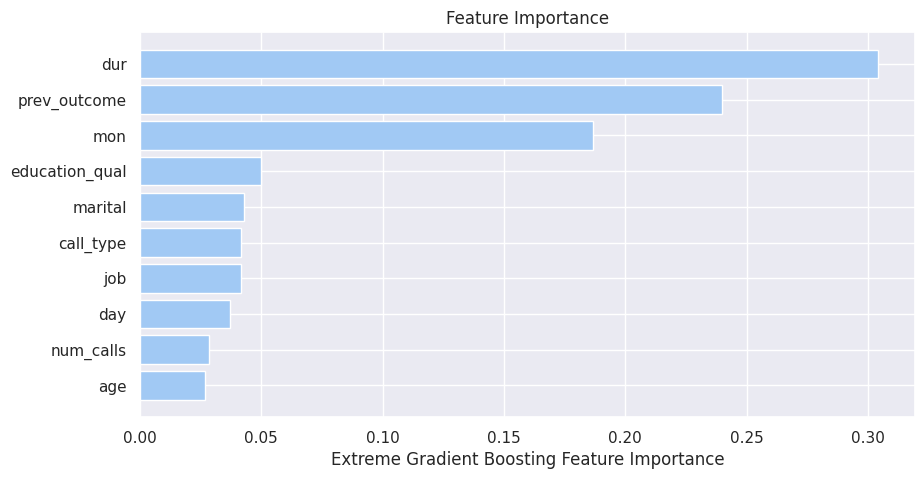

In [148]:
sorted_idx = xgb_classifier.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_classifier.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

## **Conclusion**

Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

## **(Extreme-Gradient Boosting Model)**

The client should focused on the top few features of order given below to have them subscribed to the insurance.


1. **Duration**
2. **Previous Outcome**
3. **Month**
4. **Educational Qualifications**
5. **Marital Status**
6. **Call Type**
7. **Job**
8. **Day**
9. **Number of Calls**
10.**Age**






















